# EDA

In [5]:
import pandas as pd

data_path = "../data/interim/dataset.csv"
fake_raw_data = "../data/raw/Fake.csv"
true_raw_data = "../data/raw/True.csv"

data = pd.read_csv(data_path)
fake = pd.read_csv(fake_raw_data)
true = pd.read_csv(true_raw_data)
df = data.copy()
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [3]:
df.shape

(44898, 3)

In [16]:
fake.shape

(23481, 4)

In [17]:
true.shape

(21417, 4)

In [19]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

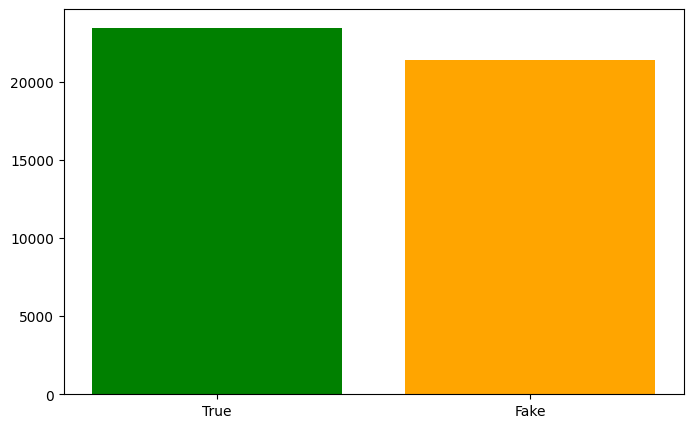

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
truth = ["True", "Fake"]
counts = [df['label'].value_counts().iloc[0], df['label'].value_counts().iloc[1]]
colors = ["green", "orange"]
plt.bar(truth, counts, color=colors)
plt.show()